# US Election 2020 Election Forecasting Using Polling Data for Simulations

![](https://i.imgur.com/XxjbFK6.jpg?1)

We'll be using the Latest Polls dataset from [FiveThirtyEight](https://data.fivethirtyeight.com/)

![](https://i.imgur.com/2ROon41.png?1
)
- The file we'll be using is called *presidential_poll.csv*

## Steps

1. Understanding our dataset from [FiveThirtyEight](https://data.fivethirtyeight.com/)
2. Cleaning and Exploring our Data
3. Changing our Data Layout
4. Understanind the US Electoral Process
5. Visualizations
6. Statistical Interpretation and Averaging of Polls
7. Simulating Elections Statistically
8. Result Analysis
9. Visualizng Results on a Map

# 1. Understanding our Dataset

In [53]:
import pandas as pd
import numpy as np
url = 'https://github.com/rajeevratan84/datascienceforbusiness/blob/master/president_polls.csv?raw=true'
df = pd.read_csv(url)
df

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Biden,13256,Joseph R. Biden Jr.,DEM,48.0
1,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Trump,13254,Donald Trump,REP,47.0
2,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,50.0
3,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Trump,13254,Donald Trump,REP,47.0
4,133777,71435,2020,Georgia,1102,Emerson College,1446,NewsNation,Emerson College,88.0,...,10/19/20 20:06,NaN,https://emersonpolling.reportablenews.com/pr/g...,general,6221,Biden,13256,Joseph R. Biden Jr.,DEM,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11904,92081,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:45,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,46.0
11905,92082,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Warren,13258,Elizabeth Warren,DEM,43.0
11906,92082,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,49.0
11907,92078,57025,2020,NaN,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,12/6/18 14:40,NaN,http://www.rasmussenreports.com/public_content...,general,6210,Obama,13253,Michelle Obama,DEM,50.0


#### Let's just see what columns we're working with

In [ ]:
df.columns

Index(['question_id', 'poll_id', 'cycle', 'state', 'pollster_id', 'pollster',
       'sponsor_ids', 'sponsors', 'display_name', 'pollster_rating_id',
       'pollster_rating_name', 'fte_grade', 'sample_size', 'population',
       'population_full', 'methodology', 'office_type', 'seat_number',
       'seat_name', 'start_date', 'end_date', 'election_date',
       'sponsor_candidate', 'internal', 'partisan', 'tracking',
       'nationwide_batch', 'ranked_choice_reallocated', 'created_at', 'notes',
       'url', 'stage', 'race_id', 'answer', 'candidate_id', 'candidate_name',
       'candidate_party', 'pct'],
      dtype='object')

There's a lot of good useful information in this dataset. Perhaps too much! We won't be using all for our simulations though.

Alot of these have potential for Statistical Analysis, I'll leave some in for you but we're only going to use the **pct** results

In [ ]:
df = df[['question_id', 'poll_id', 'state', 'pollster', 'start_date', 'end_date', 'answer', 'pct']]
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Trump,47.0
4,133777,71435,Georgia,Emerson College,10/17/20,10/19/20,Biden,47.0
...,...,...,...,...,...,...,...,...
11904,92081,57026,Ohio,Public Policy Polling,11/27/18,11/28/18,Trump,46.0
11905,92082,57026,Ohio,Public Policy Polling,11/27/18,11/28/18,Warren,43.0
11906,92082,57026,Ohio,Public Policy Polling,11/27/18,11/28/18,Trump,49.0
11907,92078,57025,NaN,Rasmussen Reports/Pulse Opinion Research,11/12/18,11/13/18,Obama,50.0


In [ ]:
print(len(df.pollster.unique()))

196


In [ ]:
df.start_date.unique()

array(['10/18/20', '10/17/20', '10/15/20', '10/13/20', '10/6/20',
       '10/16/20', '10/14/20', '10/5/20', '9/21/20', '9/20/20',
       '10/12/20', '10/4/20', '9/19/20', '10/3/20', '9/18/20', '10/11/20',
       '10/9/20', '10/2/20', '9/17/20', '10/10/20', '10/7/20', '10/1/20',
       '9/16/20', '10/8/20', '9/30/20', '9/15/20', '9/29/20', '9/14/20',
       '9/28/20', '9/27/20', '9/26/20', '9/25/20', '9/22/20', '9/24/20',
       '9/23/20', '9/1/20', '9/13/20', '9/12/20', '9/10/20', '9/11/20',
       '9/9/20', '9/8/20', '9/7/20', '9/6/20', '9/5/20', '9/4/20',
       '9/3/20', '9/2/20', '8/31/20', '8/29/20', '8/30/20', '8/28/20',
       '8/27/20', '8/26/20', '8/25/20', '8/24/20', '8/23/20', '8/22/20',
       '8/21/20', '8/20/20', '8/19/20', '8/18/20', '8/1/20', '8/17/20',
       '8/16/20', '8/15/20', '8/14/20', '8/13/20', '8/12/20', '8/11/20',
       '8/9/20', '8/10/20', '8/8/20', '8/7/20', '8/6/20', '8/5/20',
       '8/4/20', '8/3/20', '8/2/20', '7/31/20', '7/30/20', '7/28/20',
       '7

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   question_id  11909 non-null  int64  
 1   poll_id      11909 non-null  int64  
 2   state        7363 non-null   object 
 3   pollster     11909 non-null  object 
 4   start_date   11909 non-null  object 
 5   end_date     11909 non-null  object 
 6   answer       11909 non-null  object 
 7   pct          11909 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 744.4+ KB


In [ ]:
df['start_date'] = pd.to_datetime(df['end_date'])
df['end_time'] = pd.to_datetime(df['end_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   question_id  11909 non-null  int64         
 1   poll_id      11909 non-null  int64         
 2   state        7363 non-null   object        
 3   pollster     11909 non-null  object        
 4   start_date   11909 non-null  datetime64[ns]
 5   end_date     11909 non-null  object        
 6   answer       11909 non-null  object        
 7   pct          11909 non-null  float64       
 8   end_time     11909 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 837.5+ KB


<ipython-input-9-5d6c5febba7f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date'] = pd.to_datetime(df['end_date'])
<ipython-input-9-5d6c5febba7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_date'] = pd.to_datetime(df['end_date'])
<ipython-input-9-5d6c5febba7f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['end_time'] = pd.to_datetime(df['end_date'])
<ipython-input-9-5d6c5febba7f>:2: SettingWithCopyWarning: 
A value is trying to be set o

In [ ]:
df.head(10)

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,end_time
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,10/19/20,Biden,48.0,2020-10-19
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,10/19/20,Trump,47.0,2020-10-19
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,10/19/20,Biden,50.0,2020-10-19
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,10/19/20,Trump,47.0,2020-10-19
4,133777,71435,Georgia,Emerson College,2020-10-19,10/19/20,Biden,47.0,2020-10-19
5,133777,71435,Georgia,Emerson College,2020-10-19,10/19/20,Trump,48.4,2020-10-19
6,133810,71446,NaN,IBD/TIPP,2020-10-19,10/19/20,Biden,48.1,2020-10-19
7,133810,71446,NaN,IBD/TIPP,2020-10-19,10/19/20,Trump,45.8,2020-10-19
8,133810,71446,NaN,IBD/TIPP,2020-10-19,10/19/20,Jorgensen,3.0,2020-10-19
9,133810,71446,NaN,IBD/TIPP,2020-10-19,10/19/20,Hawkins,0.9,2020-10-19


# Cleaning and Exploring our data
### Filter out older Polls
Let's get all polls that start or end between Aug 1st and Nov 2nd 2020. This gives us the 3 months leading up to the Nov 2nd Election Date.

In [ ]:
start_date = '2020-08-01'
end_date = '2020-11-02'
mask = (df['start_date'] >= start_date) & (df['end_date'] >= end_date)
mask

,0
0,False
1,False
2,False
3,False
4,False
...,...
11904,False
11905,False
11906,False
11907,False


In [ ]:
df = df.loc[mask]
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,end_time
2543,130607,70108,Georgia,Landmark Communications,2020-09-30,9/30/20,Biden,46.6,2020-09-30
2544,130607,70108,Georgia,Landmark Communications,2020-09-30,9/30/20,Trump,44.9,2020-09-30
2545,130607,70108,Georgia,Landmark Communications,2020-09-30,9/30/20,Jorgensen,2.5,2020-09-30
2546,130599,70105,NaN,Change Research,2020-09-30,9/30/20,Biden,54.0,2020-09-30
2547,130599,70105,NaN,Change Research,2020-09-30,9/30/20,Trump,41.0,2020-09-30
...,...,...,...,...,...,...,...,...,...
5371,127241,67870,Utah,RMG Research,2020-08-01,8/1/20,Trump,50.0,2020-08-01
5372,127241,67870,Utah,RMG Research,2020-08-01,8/1/20,Jorgensen,3.0,2020-08-01
5373,127241,67870,Utah,RMG Research,2020-08-01,8/1/20,Hawkins,1.0,2020-08-01
5374,128114,68428,Wisconsin,Morning Consult,2020-08-01,8/1/20,Biden,51.0,2020-08-01


In [ ]:
df.answer.unique()

array(['Biden', 'Trump', 'Jorgensen', 'Hawkins', 'Pierce', 'West',
       'De La Fuente', 'La Riva', 'Kennedy', 'Blankenship', 'Simmons',
       'Pence'], dtype=object)

In [ ]:
candidates = ['Trump', 'Biden']
df = df.loc[df['answer'].isin(candidates)]
df.answer.unique()

array(['Biden', 'Trump'], dtype=object)

In [ ]:
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,end_time
2543,130607,70108,Georgia,Landmark Communications,2020-09-30,9/30/20,Biden,46.60,2020-09-30
2544,130607,70108,Georgia,Landmark Communications,2020-09-30,9/30/20,Trump,44.90,2020-09-30
2546,130599,70105,NaN,Change Research,2020-09-30,9/30/20,Biden,54.00,2020-09-30
2547,130599,70105,NaN,Change Research,2020-09-30,9/30/20,Trump,41.00,2020-09-30
2548,132056,70625,West Virginia,Triton Polling & Research,2020-09-30,9/30/20,Biden,38.00,2020-09-30
...,...,...,...,...,...,...,...,...,...
5369,132630,70851,NaN,SurveyMonkey,2020-08-01,8/1/20,Trump,46.39,2020-08-01
5370,127241,67870,Utah,RMG Research,2020-08-01,8/1/20,Biden,31.00,2020-08-01
5371,127241,67870,Utah,RMG Research,2020-08-01,8/1/20,Trump,50.00,2020-08-01
5374,128114,68428,Wisconsin,Morning Consult,2020-08-01,8/1/20,Biden,51.00,2020-08-01


In [ ]:
df.loc[df['poll_id'] == 71450]

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,end_time


In [ ]:
df = df[df['state'].notna()]
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,end_time
2543,130607,70108,Georgia,Landmark Communications,2020-09-30,9/30/20,Biden,46.6,2020-09-30
2544,130607,70108,Georgia,Landmark Communications,2020-09-30,9/30/20,Trump,44.9,2020-09-30
2548,132056,70625,West Virginia,Triton Polling & Research,2020-09-30,9/30/20,Biden,38.0,2020-09-30
2549,132056,70625,West Virginia,Triton Polling & Research,2020-09-30,9/30/20,Trump,56.0,2020-09-30
2560,130641,70119,Arizona,Suffolk University,2020-09-30,9/30/20,Biden,50.0,2020-09-30
...,...,...,...,...,...,...,...,...,...
5363,128115,68429,Wisconsin,Morning Consult,2020-08-02,8/2/20,Trump,41.0,2020-08-02
5370,127241,67870,Utah,RMG Research,2020-08-01,8/1/20,Biden,31.0,2020-08-01
5371,127241,67870,Utah,RMG Research,2020-08-01,8/1/20,Trump,50.0,2020-08-01
5374,128114,68428,Wisconsin,Morning Consult,2020-08-01,8/1/20,Biden,51.0,2020-08-01


In [ ]:
len(df.poll_id.unique())

551

# Changing Our Data Layout
We need to put the polls on a single line for easier data processing

In [ ]:
df.index = np.arange(1, len(df) + 1)
df["join_index"] = df.index + 1
df["join_index"]

<ipython-input-19-b54a6d0d0fca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["join_index"] = df.index + 1


,join_index
1,2
2,3
3,4
4,5
5,6
...,...
1428,1429
1429,1430
1430,1431
1431,1432


In [ ]:
odd_rows = df[df.index % 2 == 1]
grouped = odd_rows.join(df, "join_index", rsuffix = "second")
grouped

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,end_time,join_index,question_idsecond,poll_idsecond,statesecond,pollstersecond,start_datesecond,end_datesecond,answersecond,pctsecond,end_timesecond,join_indexsecond
1,130607,70108,Georgia,Landmark Communications,2020-09-30,9/30/20,Biden,46.60,2020-09-30,2,130607,70108,Georgia,Landmark Communications,2020-09-30,9/30/20,Trump,44.90,2020-09-30,3
3,132056,70625,West Virginia,Triton Polling & Research,2020-09-30,9/30/20,Biden,38.00,2020-09-30,4,132056,70625,West Virginia,Triton Polling & Research,2020-09-30,9/30/20,Trump,56.00,2020-09-30,5
5,130641,70119,Arizona,Suffolk University,2020-09-30,9/30/20,Biden,50.00,2020-09-30,6,130641,70119,Arizona,Suffolk University,2020-09-30,9/30/20,Trump,46.00,2020-09-30,7
7,130990,70295,Wyoming,SurveyMonkey,2020-09-30,9/30/20,Biden,33.86,2020-09-30,8,130990,70295,Wyoming,SurveyMonkey,2020-09-30,9/30/20,Trump,64.92,2020-09-30,9
9,131041,70295,Wyoming,SurveyMonkey,2020-09-30,9/30/20,Biden,32.80,2020-09-30,10,131041,70295,Wyoming,SurveyMonkey,2020-09-30,9/30/20,Trump,65.20,2020-09-30,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,127192,67937,North Carolina,Data for Progress,2020-08-02,8/2/20,Biden,46.00,2020-08-02,1424,127192,67937,North Carolina,Data for Progress,2020-08-02,8/2/20,Trump,44.00,2020-08-02,1425
1425,127193,67937,North Carolina,Data for Progress,2020-08-02,8/2/20,Biden,49.00,2020-08-02,1426,127193,67937,North Carolina,Data for Progress,2020-08-02,8/2/20,Trump,45.00,2020-08-02,1427
1427,128115,68429,Wisconsin,Morning Consult,2020-08-02,8/2/20,Biden,52.00,2020-08-02,1428,128115,68429,Wisconsin,Morning Consult,2020-08-02,8/2/20,Trump,41.00,2020-08-02,1429
1429,127241,67870,Utah,RMG Research,2020-08-01,8/1/20,Biden,31.00,2020-08-01,1430,127241,67870,Utah,RMG Research,2020-08-01,8/1/20,Trump,50.00,2020-08-01,1431


#### Let's check our State names before we move forward

We'll get rid of CD-1 and CD-2 states and just treat the poll as if it covered the whole state.

In [ ]:
grouped.state.unique()

array(['Georgia', 'West Virginia', 'Arizona', 'Wyoming', 'Wisconsin',
       'Washington', 'Vermont', 'Virginia', 'Utah', 'Texas', 'Tennessee',
       'South Dakota', 'South Carolina', 'Rhode Island', 'Pennsylvania',
       'Oregon', 'Oklahoma', 'Ohio', 'New York', 'Nevada', 'New Mexico',
       'New Jersey', 'New Hampshire', 'Nebraska', 'North Dakota',
       'North Carolina', 'Montana', 'Mississippi', 'Missouri',
       'Minnesota', 'Michigan', 'Maine', 'Maryland', 'Massachusetts',
       'Louisiana', 'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho',
       'Iowa', 'Hawaii', 'Florida', 'Delaware', 'District of Columbia',
       'Connecticut', 'Colorado', 'California', 'Arkansas', 'Alabama',
       'Alaska', 'Nebraska CD-2', 'Maine CD-1', 'Maine CD-2'],
      dtype=object)

In [ ]:
grouped['state'] = grouped['state'].str.replace(r' CD-1', '')
grouped['state'] = grouped['state'].str.replace(r' CD-2', '')

In [ ]:
grouped.state.unique()

array(['Georgia', 'West Virginia', 'Arizona', 'Wyoming', 'Wisconsin',
       'Washington', 'Vermont', 'Virginia', 'Utah', 'Texas', 'Tennessee',
       'South Dakota', 'South Carolina', 'Rhode Island', 'Pennsylvania',
       'Oregon', 'Oklahoma', 'Ohio', 'New York', 'Nevada', 'New Mexico',
       'New Jersey', 'New Hampshire', 'Nebraska', 'North Dakota',
       'North Carolina', 'Montana', 'Mississippi', 'Missouri',
       'Minnesota', 'Michigan', 'Maine', 'Maryland', 'Massachusetts',
       'Louisiana', 'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho',
       'Iowa', 'Hawaii', 'Florida', 'Delaware', 'District of Columbia',
       'Connecticut', 'Colorado', 'California', 'Arkansas', 'Alabama',
       'Alaska'], dtype=object)

# Understanding the US Electoral Process
### The USA Electoral Map
#### There are 538 seats and 270 to win

Learn more about it here - https://www.bbc.com/news/world-us-canada-53558176

![alt text](https://classroommagazines.scholastic.com/content/dam/classroom-magazines/magazines/election/election-2020/civics-in-action/the-electoral-college/ELECTION_ELECTORALCOLLEGE_HEADER_MAP.jpg)

In [ ]:
states = {
    "Alabama": 9,
    "Alaska": 3,
    "Arizona": 11,
    "Arkansas": 6,
    "California": 55,
    "Colorado": 9,
    "Connecticut": 7,
    "Delaware": 3,
    "District of Columbia": 3,
    "Florida": 29,
    "Georgia": 16,
    "Hawaii": 4,
    "Idaho": 4,
    "Illinois": 20,
    "Indiana": 11,
    "Iowa": 6,
    "Kansas": 6,
    "Kentucky": 8,
    "Louisiana": 8,
    "Maine": 4,
    "Maryland": 10,
    "Massachusetts": 11,
    "Michigan": 16,
    "Minnesota": 10,
    "Mississippi": 6,
    "Missouri": 10,
    "Montana": 3,
    "Nebraska": 5,
    "Nevada": 6,
    "New Hampshire": 4,
    "New Jersey": 14,
    "New Mexico": 5,
    "New York": 29,
    "North Carolina": 15,
    "North Dakota": 3,
    "Ohio": 18,
    "Oklahoma": 7,
    "Oregon": 7,
    "Pennsylvania": 20,
    "Rhode Island": 4,
    "South Carolina": 9,
    "South Dakota": 3,
    "Tennessee": 11,
    "Texas": 38,
    "Utah": 6,
    "Vermont": 3,
    "Virginia": 13,
    "Washington": 12,
    "West Virginia": 5,
    "Wisconsin": 10,
    "Wyoming": 3,
}

### Adding Columns, Trump, Biden and Seats to make our info cleaner

In [ ]:
def getBiden(row):
  return row["pct"] if row["answer"] == "Biden" else row["pctsecond"]
def getTrump(row):
  return row["pct"] if row["answer"] == "Trump" else row["pctsecond"]
def getSeats(row):
  return states[row["state"]]
grouped["Biden"] = grouped.apply(getBiden, axis = 1)
grouped["Trump"] = grouped.apply(getTrump, axis = 1)
grouped["Seats"] = grouped.apply(getSeats, axis = 1)
grouped.head()

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,end_time,join_index,...,pollstersecond,start_datesecond,end_datesecond,answersecond,pctsecond,end_timesecond,join_indexsecond,Biden,Trump,Seats
1,130607,70108,Georgia,Landmark Communications,2020-09-30,9/30/20,Biden,46.60,2020-09-30,2,...,Landmark Communications,2020-09-30,9/30/20,Trump,44.90,2020-09-30,3,46.60,44.90,16
3,132056,70625,West Virginia,Triton Polling & Research,2020-09-30,9/30/20,Biden,38.00,2020-09-30,4,...,Triton Polling & Research,2020-09-30,9/30/20,Trump,56.00,2020-09-30,5,38.00,56.00,5
5,130641,70119,Arizona,Suffolk University,2020-09-30,9/30/20,Biden,50.00,2020-09-30,6,...,Suffolk University,2020-09-30,9/30/20,Trump,46.00,2020-09-30,7,50.00,46.00,11
7,130990,70295,Wyoming,SurveyMonkey,2020-09-30,9/30/20,Biden,33.86,2020-09-30,8,...,SurveyMonkey,2020-09-30,9/30/20,Trump,64.92,2020-09-30,9,33.86,64.92,3
9,131041,70295,Wyoming,SurveyMonkey,2020-09-30,9/30/20,Biden,32.80,2020-09-30,10,...,SurveyMonkey,2020-09-30,9/30/20,Trump,65.20,2020-09-30,11,32.80,65.20,3


# Let's do some Visualizations

Index(['question_id', 'poll_id', 'state', 'pollster', 'start_date', 'end_date',
       'answer', 'pct', 'end_time', 'join_index', 'question_idsecond',
       'poll_idsecond', 'statesecond', 'pollstersecond', 'start_datesecond',
       'end_datesecond', 'answersecond', 'pctsecond', 'end_timesecond',
       'join_indexsecond', 'Biden', 'Trump', 'Seats'],
      dtype='object')


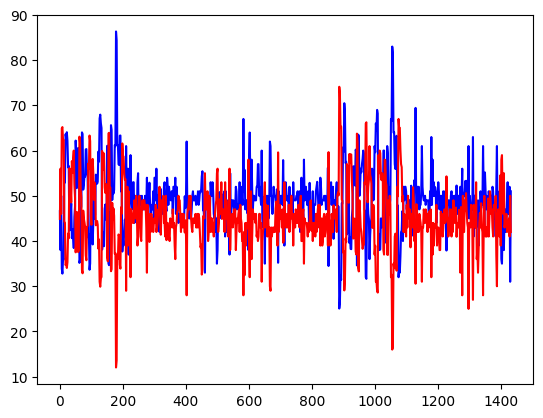

In [ ]:
import matplotlib.pyplot as plt
print(grouped.columns)
plt.plot(grouped.index, grouped['Biden'], color = "blue")
plt.plot(grouped.index, grouped['Trump'], color = "red")

In [ ]:
diff_by_date = grouped.groupby('start_date')[['Biden', 'Trump']].mean().reset_index()
diff_by_date['difference'] = diff_by_date['Biden'] - diff_by_date['Trump']
diff_by_date

,start_date,Biden,Trump,difference
0,2020-08-01,41.000000,46.000000,-5.000000
1,2020-08-02,45.219375,47.030625,-1.811250
2,2020-08-03,47.600000,43.900000,3.700000
3,2020-08-04,49.428571,46.000000,3.428571
4,2020-08-05,47.200000,45.200000,2.000000
...,...,...,...,...
56,2020-09-26,49.192308,44.161538,5.030769
57,2020-09-27,48.727273,44.818182,3.909091
58,2020-09-28,49.118750,44.900000,4.218750
59,2020-09-29,49.142857,43.857143,5.285714


In [ ]:
import plotly.express as px
fig = px.line(diff_by_date, x = "start_date", y = "difference", title = "Biden vs Trump Difference")
fig.show()

# Tidying up our data

In [ ]:
polls = grouped[['state', 'pollster', 'end_date', 'Biden', 'Trump', 'Seats']]
polls.head()

,state,pollster,end_date,Biden,Trump,Seats
1,Georgia,Landmark Communications,9/30/20,46.60,44.90,16
3,West Virginia,Triton Polling & Research,9/30/20,38.00,56.00,5
5,Arizona,Suffolk University,9/30/20,50.00,46.00,11
7,Wyoming,SurveyMonkey,9/30/20,33.86,64.92,3
9,Wyoming,SurveyMonkey,9/30/20,32.80,65.20,3


# We Add Centers and Standard Deviations to our Averaged Polling Data

Looking at the polls for each state, if you imagine that the Trump voters are stacked on the top and the Biden votes are stacked up from the bottom, with the undecideds in-between, then an argument can be made for a **very simple model** that positions the actual vote distributed around the average between the two.

For simplicity sake, let's use a normal distribution.

For every state, we're going to create a normal distribution from 0 to 100. The distribution will be **centered** between the Biden vote and the Trump vote, and the **std dev** will be half the number of undecided votes plus 3.

![](https://i.imgur.com/Zl4iyoy.png)

In [ ]:
def get_center(row):
  return row["Biden"] + (100 - row["Trump"] - row["Biden"]) / 2
polls["Center"] = polls.apply(get_center, axis = 1)
def get_deviation(row):
  return(abs(row['Trump'] - row["Center"]) / 2) + 3
polls["Stddev"] = polls.apply(get_deviation, axis = 1)
polls

<ipython-input-30-e765eb28d0ce>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-e765eb28d0ce>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state,pollster,end_date,Biden,Trump,Seats,Center,Stddev
1,Georgia,Landmark Communications,9/30/20,46.60,44.90,16,50.85,5.975
3,West Virginia,Triton Polling & Research,9/30/20,38.00,56.00,5,41.00,10.500
5,Arizona,Suffolk University,9/30/20,50.00,46.00,11,52.00,6.000
7,Wyoming,SurveyMonkey,9/30/20,33.86,64.92,3,34.47,18.225
9,Wyoming,SurveyMonkey,9/30/20,32.80,65.20,3,33.80,18.700
...,...,...,...,...,...,...,...,...
1423,North Carolina,Data for Progress,8/2/20,46.00,44.00,15,51.00,6.500
1425,North Carolina,Data for Progress,8/2/20,49.00,45.00,15,52.00,6.500
1427,Wisconsin,Morning Consult,8/2/20,52.00,41.00,10,55.50,10.250
1429,Utah,RMG Research,8/1/20,31.00,50.00,6,40.50,7.750


# Now we're going average all polls

This isn't the best method as it disregards any weighting to better polls and assumes all area equal. In a more advanced study we can use metrics like fte_grade, sample_size and methodology to weight polls.

In [ ]:
numeric_columns = ['Biden', 'Trump', 'Seats', 'Center', 'Stddev']
poll_state_summary = polls.groupby('state')[numeric_columns].mean().reset_index()
poll_state_summary

,state,Biden,Trump,Seats,Center,Stddev
0,Alabama,38.491667,57.431667,9.0,40.530000,11.450833
1,Alaska,43.688000,53.506000,3.0,45.091000,7.707500
2,Arizona,48.371860,44.973023,11.0,51.699419,6.547151
3,Arkansas,35.955000,63.057500,6.0,36.448750,16.304375
4,California,61.260833,31.595833,55.0,64.832500,19.618333
5,Colorado,53.071000,41.008000,9.0,56.031500,10.511750
6,Connecticut,62.640000,35.525000,7.0,63.557500,17.016250
7,Delaware,61.295000,34.845000,3.0,63.225000,17.190000
8,District of Columbia,83.777500,14.527500,3.0,84.625000,38.048750
9,Florida,48.501500,45.756500,29.0,51.372500,5.914750


# Simulation Time!

We're going to generate a random number from the distribution.

If it's above 50, we'll say Biden won the state.

If it's below 50, we'll say Biden lost the state.

If Biden wins the state, he gets the number of electoral seats that state represents.

If he doesn't win he get's nothing.....just the way it is, live with it.

This will give us a nice little series with the numbers representing the electoral seats she won from each state.

The output table below shows for each state (in a each row), the number of seats Biden one. The column represents the results of one simulation.

In [52]:
from numpy.random import normal

def run_election_simulation(times, polls):
    # Create a blank data frame to hold our results
    result_frame = pd.DataFrame()

    def get_seats(row):
        # using the Normal Distriution function, we input the mean (center) and STD
        # if the result is great than 50, that indicates a win for Biden
        result = normal(row["Center"], row["Stddev"])
        return row["Seats"] if result > 50 else 0

    for i in range(times):
        result_frame[i] = polls.apply(get_seats, axis=1)

    return result_frame

# given an example of the output
res = run_election_simulation(10, poll_state_summary)
res.loc['Total',:] = res.sum(axis=0)

# Adding State Name to Results DF
res = pd.concat([poll_state_summary['state'], res], axis=1, sort=False)

# A 0.0 means Biden didn't win that seat, or that Trump won that seat
res

,state,0,1,2,3,4,5,6,7,8,9
0,Alabama,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
1,Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2,Arizona,11.0,11.0,11.0,11.0,11.0,11.0,11.0,0.0,0.0,11.0
3,Arkansas,0.0,6.0,6.0,0.0,0.0,6.0,0.0,6.0,6.0,6.0
4,California,55.0,55.0,55.0,0.0,55.0,55.0,0.0,55.0,0.0,55.0
5,Colorado,0.0,0.0,9.0,9.0,9.0,0.0,0.0,0.0,0.0,9.0
6,Connecticut,7.0,7.0,0.0,7.0,0.0,7.0,7.0,7.0,7.0,0.0
7,Delaware,0.0,3.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0
8,District of Columbia,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
9,Florida,29.0,29.0,29.0,29.0,0.0,0.0,0.0,29.0,0.0,29.0


# Let's analyze the above simulated results on a per state level

In [ ]:
summary = pd.DataFrame((res == 0).astype(int).sum(axis = 1))
res_summary = pd.concat([poll_state_summary['state'], summary], axis = 1, sort = False)
res_summary.columns = ['state', 'trump_wins']
res_summary['percent_trump_wins'] = (res_summary['trump_wins'] / 10) * 100
res_summary

,state,trump_wins,percent_trump_wins
0,Alabama,9,90.0
1,Alaska,8,80.0
2,Arizona,3,30.0
3,Arkansas,8,80.0
4,California,1,10.0
5,Colorado,3,30.0
6,Connecticut,1,10.0
7,Delaware,2,20.0
8,District of Columbia,5,50.0
9,Florida,2,20.0


### Let's get the sum of Biden's wins across the simulations

In [ ]:
res.loc['Total'][res.loc['Total'] > 270.0].count()

8

## THIS WHERE THE SIMULATIONS HAPPEN (10K)

In [46]:
number_of_simulations = 10000
election_results = run_election_simulation(number_of_simulations, poll_state_summary)
election_results.loc['Total', :] = election_results.sum(axis = 0)
biden_wins = election_results.loc['Total'][election_results.loc['Total'] > 270.0].count()
f"Joe Biden wins {biden_wins} times out of {number_of_simulations} simulations"

Streaming output truncated to the last 5000 lines.
<ipython-input-32-2ef1dc04823f>:14: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-32-2ef1dc04823f>:14: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-32-2ef1dc04823f>:14: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipy

'Joe Biden wins 7722 times out of 10000 simulations'

# Let's now summarize it per state

In [48]:
summary = pd.DataFrame((election_results == 0).astype(int).sum(axis = 1))
res_summary = pd.concat([poll_state_summary['state'], summary], axis = 1, sort = False)
res_summary.columns = ['state', 'trump_wins']
res_summary['percent_trump_wins'] = (res_summary['trump_wins'] / number_of_simulations) * 100
res_summary['percent_biden_wins'] = 100 - res_summary['percent_trump_wins']
res_summary = res_summary.dropna()
res_summary#.sort_values(by = "trump_wins")

,state,trump_wins,percent_trump_wins,percent_biden_wins
0,Alabama,7996,79.96,20.04
1,Alaska,7320,73.20,26.80
2,Arizona,3971,39.71,60.29
3,Arkansas,7948,79.48,20.52
4,California,2242,22.42,77.58
5,Colorado,2787,27.87,72.13
6,Connecticut,2118,21.18,78.82
7,Delaware,2222,22.22,77.78
8,District of Columbia,1867,18.67,81.33
9,Florida,4046,40.46,59.54


In [49]:
res_summary.sort_values('percent_biden_wins', ascending = False).head(30)

,state,trump_wins,percent_trump_wins,percent_biden_wins
8,District of Columbia,1867,18.67,81.33
45,Vermont,2044,20.44,79.56
21,Massachusetts,2060,20.60,79.40
6,Connecticut,2118,21.18,78.82
11,Hawaii,2119,21.19,78.81
32,New York,2145,21.45,78.55
20,Maryland,2147,21.47,78.53
7,Delaware,2222,22.22,77.78
4,California,2242,22.42,77.58
47,Washington,2278,22.78,77.22


In [50]:
def getSeats(row):
    return states[row["state"]]

res_summary["seats"] = res_summary.apply(getSeats, axis=1)

res_summary['seats_trump_wins'] = res_summary['percent_trump_wins'].apply(lambda x: 1 if x > 50 else 0)
res_summary['seats_trump_wins'] = res_summary['seats_trump_wins'] * res_summary['seats']

res_summary['seats_biden_wins'] = res_summary['percent_biden_wins'].apply(lambda x: 1 if x > 50 else 0)
res_summary['seats_biden_wins'] = res_summary['seats_biden_wins'] * res_summary['seats']
seats_trump_wins = res_summary['seats_trump_wins'].sum()
seats_biden_wins = res_summary['seats_biden_wins'].sum()
print(seats_biden_wins)
print(seats_trump_wins)
res_summary

350
188


,state,trump_wins,percent_trump_wins,percent_biden_wins,seats,seats_trump_wins,seats_biden_wins
0,Alabama,7996,79.96,20.04,9,9,0
1,Alaska,7320,73.20,26.80,3,3,0
2,Arizona,3971,39.71,60.29,11,0,11
3,Arkansas,7948,79.48,20.52,6,6,0
4,California,2242,22.42,77.58,55,0,55
5,Colorado,2787,27.87,72.13,9,0,9
6,Connecticut,2118,21.18,78.82,7,0,7
7,Delaware,2222,22.22,77.78,3,0,3
8,District of Columbia,1867,18.67,81.33,3,0,3
9,Florida,4046,40.46,59.54,29,0,29


# Creating a US Election Map

In [55]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

res_summary = res_summary.replace({"state": us_state_abbrev})
res_summary.head()

,state,trump_wins,percent_trump_wins,percent_biden_wins,seats,seats_trump_wins,seats_biden_wins
0,AL,7996,79.96,20.04,9,9,0
1,AK,7320,73.20,26.80,3,3,0
2,AZ,3971,39.71,60.29,11,0,11
3,AR,7948,79.48,20.52,6,6,0
4,CA,2242,22.42,77.58,55,0,55


In [56]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = res_summary['state'], # Spatial coordinates
    z = res_summary['percent_trump_wins'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Bluered',
    colorbar_title = "Trump",
))

title = f'{number_of_simulations} Simulations of the 2020 US Election show Biden winning {seats_biden_wins} and Trump winning {seats_trump_wins} Seats'
fig.update_layout(
    title_text = title, #'2020 Simulation of The US Presidential Election',
    geo_scope='usa', # limite map scope to USA
)

fig.show()